In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime


In [2]:

def add_timestamps_to_bcg(input_file, output_file, sampling_frequency=140, start_timestamp=None):
    """
    Add timestamps to BCG data from a CSV file.
    
    Parameters:
    - input_file: Path to the input CSV file containing BCG data
    - output_file: Path to save the output CSV file with timestamps
    - sampling_frequency: The sampling frequency in Hz (default: 140)
    - start_timestamp: Optional starting timestamp in milliseconds
                       If None, current time will be used
    
    Returns:
    - DataFrame with BCG data and timestamps
    """
    # Read the input CSV file
    try:
        df = pd.read_csv(input_file)
    except Exception as e:
        print(f"Error reading the input file: {e}")
        return None
        
    # Extract BCG column if it exists
    if 'BCG' not in df.columns:
        # If BCG column doesn't exist, assume the first column is BCG data
        if len(df.columns) >= 1:
            df = pd.DataFrame(df.iloc[:, 0], columns=['BCG'])
        else:
            print("No data found in the input file")
            return None
    else:
        # Keep only the BCG column
        df = df[['BCG']]
    
    # Determine the starting timestamp
    if start_timestamp is None:
        # Use current time in milliseconds
        start_timestamp = int(datetime.now().timestamp() * 1000)
    
    # Calculate time interval between samples in milliseconds
    interval = 1000 / sampling_frequency
    
    # Generate timestamps for each row
    num_samples = len(df)
    timestamps = [start_timestamp + i * interval for i in range(num_samples)]
    
    # Round timestamps to integers
    timestamps = [int(t) for t in timestamps]
    
    # Add timestamps and sampling frequency to the dataframe
    df['Timestamp'] = timestamps
    df['fs'] = sampling_frequency
    
    # Save to output file
    try:
        df.to_csv(output_file, index=False)
        print(f"Timestamps added successfully. Output saved to {output_file}")
    except Exception as e:
        print(f"Error saving output file: {e}")
    
    return df


In [3]:

# Example usage
if __name__ == "__main__":
    # Replace these with your actual file paths
    input_csv = r"/home/rabieash/projects/data_project/data/data/03/BCG/03_20231105_BCG.csv"
    output_csv = "bcg_data_with_timestamps.csv"
    
    # Optional: specify a starting timestamp (in milliseconds since epoch)
    # start_time = 1699022112866  # Example timestamp
    
    # Call the function with default parameters
    result = add_timestamps_to_bcg(input_file=input_csv, output_file=output_csv)
    
    # Alternatively, specify all parameters
    # result = add_timestamps_to_bcg(input_csv, output_csv, sampling_frequency=140, start_timestamp=start_time)
    
    # Display the first few rows of the result
    if result is not None:
        print("\nFirst few rows of the result:")
        print(result.head())

Timestamps added successfully. Output saved to bcg_data_with_timestamps.csv

First few rows of the result:
   BCG      Timestamp   fs
0  -40  1746807468248  140
1  -41  1746807468255  140
2  -36  1746807468262  140
3  -44  1746807468269  140
4  -41  1746807468276  140


In [4]:
hr=pd.read_csv(r"/home/rabieash/projects/data_project/data/data/03/Reference/RR/03_20231105_RR.csv")
hr.head

<bound method NDFrame.head of                Timestamp  Heart Rate  RR Interval in seconds
0      2023/11/5 0:03:48          84                   0.813
1      2023/11/5 0:03:49          83                   0.876
2      2023/11/5 0:03:50          81                   0.745
3      2023/11/5 0:03:50          81                   0.706
4      2023/11/5 0:03:51          81                   0.722
...                  ...         ...                     ...
35595  2023/11/5 9:29:28         101                   4.077
35596  2023/11/5 9:29:28         101                   0.416
35597  2023/11/5 9:29:29         102                   1.864
35598  2023/11/5 9:29:33         102                   0.781
35599  2023/11/5 9:29:33         102                   4.423

[35600 rows x 3 columns]>

In [5]:
# Read the files
bcg_df = pd.read_csv("/home/rabieash/projects/data_project/code/bcg_data_with_timestamps.csv")
hr_df = pd.read_csv("/home/rabieash/projects/data_project/data/data/03/Reference/RR/03_20231105_RR.csv")



In [6]:
# Convert BCG timestamp to human-readable format
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['Timestamp'], unit='ms')
bcg_df['human_readable_timestamp'] = bcg_df['human_readable_timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S.%f').str[:-3]

# Display the first few rows to verify the conversion
print("\nFirst few rows of BCG data with human-readable timestamps:")
print(bcg_df[['BCG', 'human_readable_timestamp', 'fs']].head())

# Save the updated dataframe if needed
#bcg_df.to_csv("bcg_data_with_human_readable_timestamps.csv", index=False)


First few rows of BCG data with human-readable timestamps:
   BCG human_readable_timestamp   fs
0  -40  2025/05/09 16:17:48.248  140
1  -41  2025/05/09 16:17:48.255  140
2  -36  2025/05/09 16:17:48.262  140
3  -44  2025/05/09 16:17:48.269  140
4  -41  2025/05/09 16:17:48.276  140


In [7]:
# Convert BCG timestamp to human-readable format and adjust to start from 2023/11/2
target_start = pd.to_datetime('2023/11/2 21:05:42.564 ')  # Using the start time from HR data
current_start = pd.to_datetime(bcg_df['Timestamp'].iloc[0], unit='ms')
time_diff = target_start - current_start

# Adjust timestamps
bcg_df['adjusted_timestamp'] = pd.to_datetime(bcg_df['Timestamp'], unit='ms') + time_diff
bcg_df['human_readable_timestamp'] = bcg_df['adjusted_timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S.%f').str[:-3]

# Display the first few rows to verify the conversion
print("\nFirst few rows of BCG data with adjusted timestamps:")
print(bcg_df[['BCG', 'human_readable_timestamp', 'fs']].head())

# Save the updated dataframe
#bcg_df.to_csv("bcg_data_with_adjusted_timestamps.csv", index=False)


First few rows of BCG data with adjusted timestamps:
   BCG human_readable_timestamp   fs
0  -40  2023/11/02 21:05:42.564  140
1  -41  2023/11/02 21:05:42.571  140
2  -36  2023/11/02 21:05:42.578  140
3  -44  2023/11/02 21:05:42.585  140
4  -41  2023/11/02 21:05:42.592  140


In [8]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp,adjusted_timestamp
0,-40,1746807468248,140,2023/11/02 21:05:42.564,2023-11-02 21:05:42.564
1,-41,1746807468255,140,2023/11/02 21:05:42.571,2023-11-02 21:05:42.571
2,-36,1746807468262,140,2023/11/02 21:05:42.578,2023-11-02 21:05:42.578
3,-44,1746807468269,140,2023/11/02 21:05:42.585,2023-11-02 21:05:42.585
4,-41,1746807468276,140,2023/11/02 21:05:42.592,2023-11-02 21:05:42.592
...,...,...,...,...,...
4890301,-201,1746842398969,140,2023/11/03 06:47:53.285,2023-11-03 06:47:53.285
4890302,-207,1746842398976,140,2023/11/03 06:47:53.292,2023-11-03 06:47:53.292
4890303,-206,1746842398983,140,2023/11/03 06:47:53.299,2023-11-03 06:47:53.299
4890304,-204,1746842398990,140,2023/11/03 06:47:53.306,2023-11-03 06:47:53.306


In [9]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp,adjusted_timestamp
0,-40,1746807468248,140,2023/11/02 21:05:42.564,2023-11-02 21:05:42.564
1,-41,1746807468255,140,2023/11/02 21:05:42.571,2023-11-02 21:05:42.571
2,-36,1746807468262,140,2023/11/02 21:05:42.578,2023-11-02 21:05:42.578
3,-44,1746807468269,140,2023/11/02 21:05:42.585,2023-11-02 21:05:42.585
4,-41,1746807468276,140,2023/11/02 21:05:42.592,2023-11-02 21:05:42.592
...,...,...,...,...,...
4890301,-201,1746842398969,140,2023/11/03 06:47:53.285,2023-11-03 06:47:53.285
4890302,-207,1746842398976,140,2023/11/03 06:47:53.292,2023-11-03 06:47:53.292
4890303,-206,1746842398983,140,2023/11/03 06:47:53.299,2023-11-03 06:47:53.299
4890304,-204,1746842398990,140,2023/11/03 06:47:53.306,2023-11-03 06:47:53.306


In [10]:
hr_df.head(-5)

,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


In [11]:
# Remove the specified columns
bcg_df = bcg_df.drop(['adjusted_timestamp'], axis=1)

# Display the first few rows to verify the columns were removed
print("\nFirst few rows of BCG data after removing columns:")
print(bcg_df.head())

# Save the updated dataframe
bcg_df.to_csv("bcg_data_cleaned.csv", index=False)


First few rows of BCG data after removing columns:
   BCG      Timestamp   fs human_readable_timestamp
0  -40  1746807468248  140  2023/11/02 21:05:42.564
1  -41  1746807468255  140  2023/11/02 21:05:42.571
2  -36  1746807468262  140  2023/11/02 21:05:42.578
3  -44  1746807468269  140  2023/11/02 21:05:42.585
4  -41  1746807468276  140  2023/11/02 21:05:42.592


In [12]:
bcg_df.head(-5)


,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1746807468248,140,2023/11/02 21:05:42.564
1,-41,1746807468255,140,2023/11/02 21:05:42.571
2,-36,1746807468262,140,2023/11/02 21:05:42.578
3,-44,1746807468269,140,2023/11/02 21:05:42.585
4,-41,1746807468276,140,2023/11/02 21:05:42.592
...,...,...,...,...
4890301,-201,1746842398969,140,2023/11/03 06:47:53.285
4890302,-207,1746842398976,140,2023/11/03 06:47:53.292
4890303,-206,1746842398983,140,2023/11/03 06:47:53.299
4890304,-204,1746842398990,140,2023/11/03 06:47:53.306


In [13]:
hr_df.head(-5)


,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


In [14]:
# Convert timestamps to datetime for comparison
bcg_start = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[0])
bcg_end = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[-1])
hr_start = pd.to_datetime(hr_df['Timestamp'].iloc[0])
hr_end = pd.to_datetime(hr_df['Timestamp'].iloc[-1])

print("BCG Data:")
print(f"Start time: {bcg_start}")
print(f"End time: {bcg_end}")
print("\nHeart Rate Data:")
print(f"Start time: {hr_start}")
print(f"End time: {hr_end}")

# Determine which dataset starts later and ends earlier
if bcg_start > hr_start:
    print("\nBCG data starts later than Heart Rate data")
else:
    print("\nHeart Rate data starts later than BCG data")

if bcg_end < hr_end:
    print("BCG data ends earlier than Heart Rate data")
else:
    print("Heart Rate data ends earlier than BCG data")

# Calculate the overlap period
overlap_start = max(bcg_start, hr_start)
overlap_end = min(bcg_end, hr_end)
print(f"\nOverlap period:")
print(f"Start: {overlap_start}")
print(f"End: {overlap_end}")

BCG Data:
Start time: 2023-11-02 21:05:42.564000
End time: 2023-11-03 06:47:53.349000

Heart Rate Data:
Start time: 2023-11-05 00:03:48
End time: 2023-11-05 09:29:33

Heart Rate data starts later than BCG data
BCG data ends earlier than Heart Rate data

Overlap period:
Start: 2023-11-05 00:03:48
End: 2023-11-03 06:47:53.349000


In [15]:
# Convert the timestamps to datetime (if not already)
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['human_readable_timestamp'])
hr_df['Timestamp'] = pd.to_datetime(hr_df['Timestamp'])

# Extract only the time part (ignoring the date) from the timestamps
bcg_df['time'] = bcg_df['human_readable_timestamp'].dt.time
hr_df['time'] = hr_df['Timestamp'].dt.time

# Extract the time from the overlap period (ignoring the date)
overlap_start_time = overlap_start.time()
overlap_end_time = overlap_end.time()

# Filter both dataframes to only include data within the overlap period based on time
bcg_df_filtered = bcg_df[(bcg_df['time'] >= overlap_start_time) & 
                          (bcg_df['time'] <= overlap_end_time)]

hr_df_filtered = hr_df[(hr_df['time'] >= overlap_start_time) & 
                       (hr_df['time'] <= overlap_end_time)]

# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head())

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head())



Filtered BCG Data (Time-based filtering):
         BCG      Timestamp   fs human_readable_timestamp             time
1495962 -978  1746818153690  140  2023-11-03 00:03:48.006  00:03:48.006000
1495963 -973  1746818153698  140  2023-11-03 00:03:48.014  00:03:48.014000
1495964 -948  1746818153705  140  2023-11-03 00:03:48.021  00:03:48.021000
1495965 -934  1746818153712  140  2023-11-03 00:03:48.028  00:03:48.028000
1495966 -922  1746818153719  140  2023-11-03 00:03:48.035  00:03:48.035000

Filtered Heart Rate Data (Time-based filtering):
            Timestamp  Heart Rate  RR Interval in seconds      time
0 2023-11-05 00:03:48          84                   0.813  00:03:48
1 2023-11-05 00:03:49          83                   0.876  00:03:49
2 2023-11-05 00:03:50          81                   0.745  00:03:50
3 2023-11-05 00:03:50          81                   0.706  00:03:50
4 2023-11-05 00:03:51          81                   0.722  00:03:51


In [16]:
# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head(-5))

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head(-5))


Filtered BCG Data (Time-based filtering):
         BCG      Timestamp   fs human_readable_timestamp             time
1495962 -978  1746818153690  140  2023-11-03 00:03:48.006  00:03:48.006000
1495963 -973  1746818153698  140  2023-11-03 00:03:48.014  00:03:48.014000
1495964 -948  1746818153705  140  2023-11-03 00:03:48.021  00:03:48.021000
1495965 -934  1746818153712  140  2023-11-03 00:03:48.028  00:03:48.028000
1495966 -922  1746818153719  140  2023-11-03 00:03:48.035  00:03:48.035000
...      ...            ...  ...                      ...              ...
4890301 -201  1746842398969  140  2023-11-03 06:47:53.285  06:47:53.285000
4890302 -207  1746842398976  140  2023-11-03 06:47:53.292  06:47:53.292000
4890303 -206  1746842398983  140  2023-11-03 06:47:53.299  06:47:53.299000
4890304 -204  1746842398990  140  2023-11-03 06:47:53.306  06:47:53.306000
4890305 -208  1746842398998  140  2023-11-03 06:47:53.314  06:47:53.314000

[3394344 rows x 5 columns]

Filtered Heart Rate Data (Ti

In [17]:
# Save the filtered dataframe
hr_df_filtered.to_csv("hr_data_filtered.csv", index=False)

In [18]:
bcg_df_filtered.head()

,BCG,Timestamp,fs,human_readable_timestamp,time
1495962,-978,1746818153690,140,2023-11-03 00:03:48.006,00:03:48.006000
1495963,-973,1746818153698,140,2023-11-03 00:03:48.014,00:03:48.014000
1495964,-948,1746818153705,140,2023-11-03 00:03:48.021,00:03:48.021000
1495965,-934,1746818153712,140,2023-11-03 00:03:48.028,00:03:48.028000
1495966,-922,1746818153719,140,2023-11-03 00:03:48.035,00:03:48.035000


In [19]:
import numpy as np
import pandas as pd

# Get only numeric columns
numeric_cols = bcg_df_filtered.select_dtypes(include='number').columns

# Original and target sample rates
fs_original = 140
fs_target = 50

# Time vectors
t_original = np.arange(len(bcg_df_filtered)) / fs_original
t_target = np.arange(0, t_original[-1], 1/fs_target)

# Interpolate only numeric columns
bcg_df_resampled = pd.DataFrame({
    col: np.interp(t_target, t_original, bcg_df_filtered[col].values.astype(float))
    for col in numeric_cols
})

# Optionally, reset index or add time column
#bcg_df_resampled['time'] = t_target


In [20]:
# Save the filtered dataframe
bcg_df_resampled.to_csv("bcg_df_resampled.csv", index=False)

In [21]:
print(len(bcg_df_resampled))

1212268


In [22]:
print("Original duration (s):", len(bcg_df_filtered) / 140)
print("Expected resampled length:", len(bcg_df_filtered) / 140 * 50)
print("Actual resampled length:", len(bcg_df_resampled))


Original duration (s): 24245.35
Expected resampled length: 1212267.5
Actual resampled length: 1212268


In [23]:
bcg_df_resampled.head()

,BCG,Timestamp,fs
0,-978.0,1.746818e+12,140.0
1,-936.8,1.746818e+12,140.0
2,-903.2,1.746818e+12,140.0
3,-95.0,1.746818e+12,140.0
4,-39.0,1.746818e+12,140.0


In [24]:
# Import required libraries
import math
import os

import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

from band_pass_filtering import band_pass_filtering
from compute_vitals import vitals
from detect_apnea_events import apnea_events
from detect_body_movements import detect_patterns
from modwt_matlab_fft import modwt
from modwt_mra_matlab_fft import modwtmra
from remove_nonLinear_trend import remove_nonLinear_trend
from data_subplot import data_subplot

In [25]:
print(detect_patterns.__code__.co_argcount)


6


In [26]:
utc_time = bcg_df_resampled['Timestamp']
utc_time = utc_time.to_numpy()
data_stream = bcg_df_resampled['BCG']

start_point, end_point, window_shift, fs = 0, 500, 500, 50
# ==========================================================================================================
data_stream, utc_time, flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)
# ==========================================================================================================
# BCG signal extraction
movement = band_pass_filtering(data_stream, fs, "bcg")
# ==========================================================================================================
# Respiratory signal extraction
breathing = band_pass_filtering(data_stream, fs, "breath")
breathing = remove_nonLinear_trend(breathing, 3)
breathing = savgol_filter(breathing, 11, 3)
# ==========================================================================================================
w = modwt(movement, 'bior3.9', 4)
dc = modwtmra(w, 'bior3.9')
wavelet_cycle = dc[4]
# ==========================================================================================================
# Vital Signs estimation - (10 seconds window is an optimal size for vital signs measurement)
t1, t2, window_length, window_shift = 0, 500, 500, 500
hop_size = math.floor((window_length - 1) / 2)
limit = int(math.floor(breathing.size / window_shift))
# ==========================================================================================================
# Heart Rate
#beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

Returning data, time, event_flags...
Data: 0   -978.0
1   -936.8
2   -903.2
3    -95.0
4    -39.0
Name: BCG, dtype: float64
Time: [1.74681815e+12 1.74681815e+12 1.74681815e+12 1.74681815e+12
 1.74681815e+12]
Event Flags: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [27]:
print("wavelet_cycle length:", len(wavelet_cycle))
print("utc_time length:", len(utc_time))
print("t2:", t2)




wavelet_cycle length: 1212268
utc_time length: 1212268
t2: 500


In [28]:
# Heart Rate
beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

In [29]:
beats

array([80.08, 76.03, 69.13, ..., 82.63, 72.53, 75.  ])

In [30]:
len(beats)

2424

In [31]:
len(hr_df_filtered)

25820

In [32]:
hr_df_filtered.head()


,Timestamp,Heart Rate,RR Interval in seconds,time
0,2023-11-05 00:03:48,84,0.813,00:03:48
1,2023-11-05 00:03:49,83,0.876,00:03:49
2,2023-11-05 00:03:50,81,0.745,00:03:50
3,2023-11-05 00:03:50,81,0.706,00:03:50
4,2023-11-05 00:03:51,81,0.722,00:03:51


In [33]:
import pandas as pd

# If datetime is not in columns but is already the index, reset and convert
if 'Timestamp' not in hr_df_filtered.columns:
    hr_df_filtered = hr_df_filtered.reset_index()

# Now ensure it's in datetime format
hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])

# Set datetime as index
hr_df_filtered = hr_df_filtered.set_index('Timestamp')

# Keep only numeric columns (like Heart Rate and RR Interval)
numeric_cols = hr_df_filtered.select_dtypes(include='number')

# Resample every 10 seconds and compute mean
hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


/tmp/ipykernel_19308/3657441826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])
/tmp/ipykernel_19308/3657441826.py:17: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


In [34]:
print("hr_df_avg_10s:",len(hr_df_avg_10s))
print("beats:",len(beats))



hr_df_avg_10s: 2426
beats: 2424


In [35]:
# Save the filtered dataframe
hr_df_avg_10s.to_csv("hr_df_avg_10s.csv", index=False)

In [36]:
# Ensure both arrays have the same length
min_length = min(len(beats), len(hr_df_avg_10s))

# Trim the larger one
beats_trimmed = beats[:min_length]
hr_df_avg_10s_trimmed = hr_df_avg_10s[:min_length]


In [37]:
print("hr_df_avg_10s_trimmed:",len(hr_df_avg_10s_trimmed))
print("beats_trimmed:",len(beats_trimmed))


hr_df_avg_10s_trimmed: 2424
beats_trimmed: 2424


In [38]:
hr_df_avg_10s_trimmed.head()


,Timestamp,Heart Rate,RR Interval in seconds
0,2023-11-05 00:03:40,83.500000,0.844500
1,2023-11-05 00:03:50,79.923077,0.779692
2,2023-11-05 00:04:00,78.384615,0.758923
3,2023-11-05 00:04:10,79.785714,0.749786
4,2023-11-05 00:04:20,80.846154,0.727385


In [39]:
HR = hr_df_avg_10s_trimmed['Heart Rate'].tolist()


In [40]:
HR

[83.5,
 79.92307692307692,
 78.38461538461539,
 79.78571428571429,
 80.84615384615384,
 82.64285714285714,
 80.38461538461539,
 83.0,
 95.46666666666667,
 89.84615384615384,
 78.84615384615384,
 88.29411764705883,
 95.0,
 85.92857142857143,
 89.6875,
 nan,
 95.875,
 102.94117647058823,
 105.11111111111111,
 99.84615384615384,
 95.1875,
 88.92857142857143,
 86.0,
 86.6,
 83.76923076923077,
 81.07692307692308,
 80.71428571428571,
 80.64285714285714,
 81.58333333333333,
 80.21428571428571,
 80.5,
 76.18181818181819,
 76.53846153846153,
 77.0,
 76.66666666666667,
 77.21428571428571,
 79.78571428571429,
 82.53846153846153,
 81.46153846153847,
 77.61538461538461,
 76.66666666666667,
 78.14285714285714,
 80.07692307692308,
 80.07692307692308,
 79.85714285714286,
 81.0,
 80.0,
 80.0,
 78.5,
 77.21428571428571,
 80.76923076923077,
 81.21428571428571,
 79.6923076923077,
 78.6923076923077,
 78.84615384615384,
 80.0,
 80.21428571428571,
 79.92307692307692,
 79.92307692307692,
 79.57142857142857,
 

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [43]:
# Assuming the detect_patterns function is updated as shown above
start_point, end_point, window_shift, fs = 0, 500, 500, 50
data_stream, utc_time, event_flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)

# Detect bad windows (Movement and No-movement)
bad_window_indices = np.where((event_flags == 2) | (event_flags == 3))[0]  # Movement or No-movement flags

# Assuming `beats` and `HR` are already created and aligned:
beats_trimmed = np.array(beats[:len(event_flags)])
HR = np.array(HR[:len(event_flags)])

# Remove the bad window indices from both beats_trimmed and HR
beats_trimmed = np.delete(beats_trimmed, bad_window_indices)
HR = np.delete(HR, bad_window_indices)

# **Ensure they are of the same length**
min_length = min(len(beats_trimmed), len(HR))
beats_trimmed = beats_trimmed[:min_length]
HR = HR[:min_length]

# Drop NaN values from both arrays
valid_indices = ~np.isnan(beats_trimmed) & ~np.isnan(HR) & (HR != 0)  # Exclude zero values from HR
beats_trimmed = beats_trimmed[valid_indices]
HR = HR[valid_indices]

# **Calculate MAE, RMSE, and MAPE**
mae = mean_absolute_error(HR, beats_trimmed)
rmse = np.sqrt(mean_squared_error(HR, beats_trimmed))
mape = np.mean(np.abs((HR - beats_trimmed) / HR)) * 100  # Fixed HR variable name

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Returning data, time, event_flags...
Data: 0   -978.0
1   -936.8
2   -903.2
3    -95.0
4    -39.0
Name: BCG, dtype: float64
Time: [1.74681815e+12 1.74681815e+12 1.74681815e+12 1.74681815e+12
 1.74681815e+12]
Event Flags: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Mean Absolute Error (MAE): 9.154143030856897
Root Mean Square Error (RMSE): 12.794846351405635
Mean Absolute Percentage Error (MAPE): 10.805769582235419%


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats

# Trim arrays to equal length
min_length = min(len(beats), len(HR))
beats_trimmed = np.array(beats[:min_length])
HR = np.array(HR[:min_length])

# Drop NaN values from both arrays
valid_indices = ~np.isnan(beats_trimmed) & ~np.isnan(HR) & (HR != 0)  # Exclude zero values from HR
beats_trimmed = beats_trimmed[valid_indices]
HR = HR[valid_indices]

# 1. **Calculate MAE, RMSE, and MAPE**
mae = mean_absolute_error(HR, beats_trimmed)
rmse = np.sqrt(mean_squared_error(HR, beats_trimmed))
mape = np.mean(np.abs((HR - beats_trimmed) / HR)) * 100  # Fixed HR variable name

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 13.585078877825975
Root Mean Square Error (RMSE): 15.853081445423465
Mean Absolute Percentage Error (MAPE): 20.526217840628405%


In [52]:
%matplotlib inline


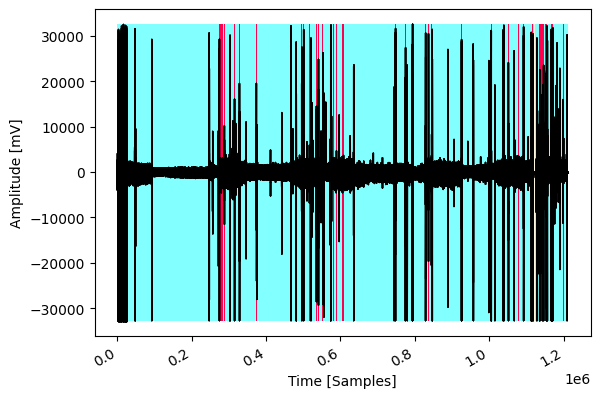

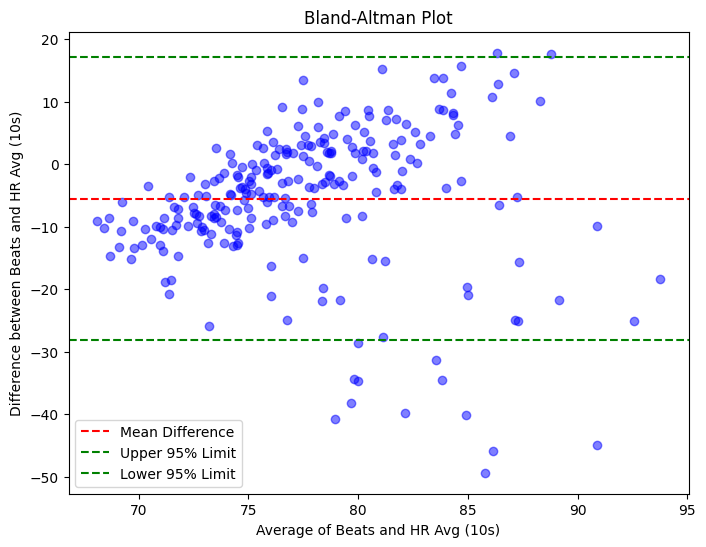

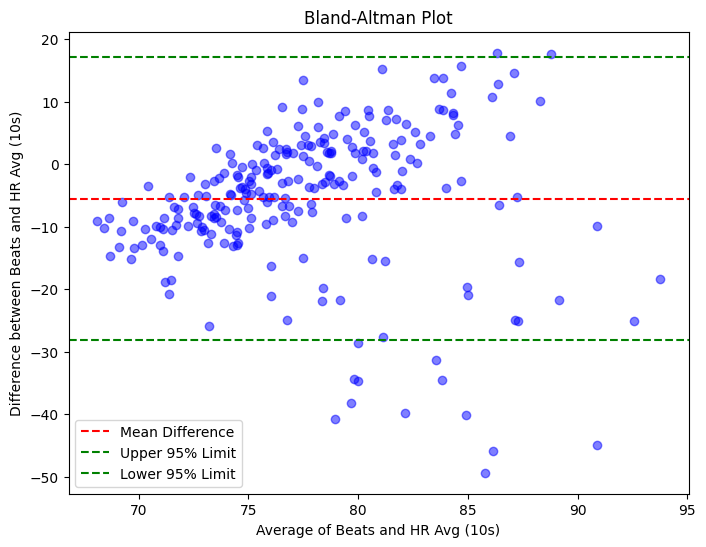

<Figure size 800x600 with 0 Axes>

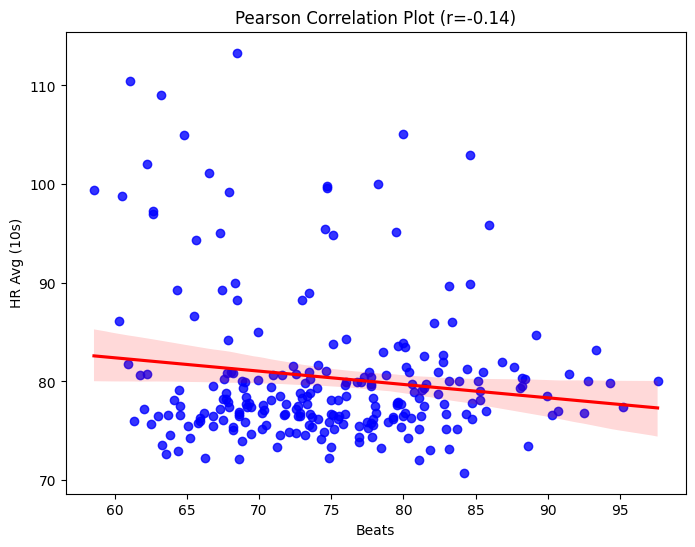

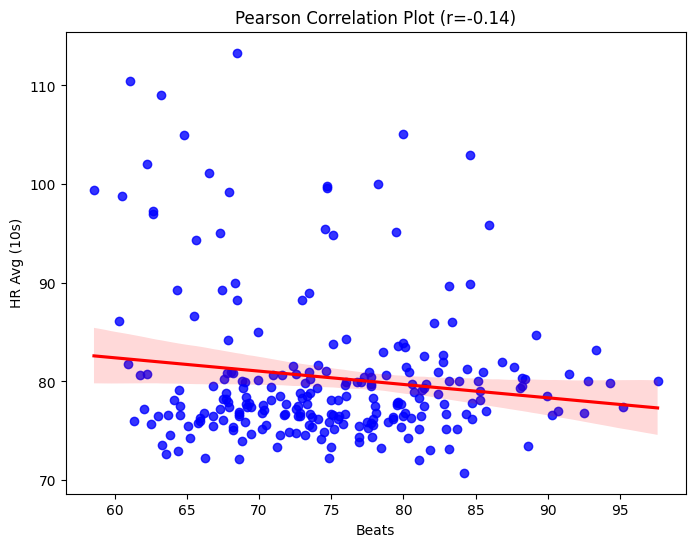

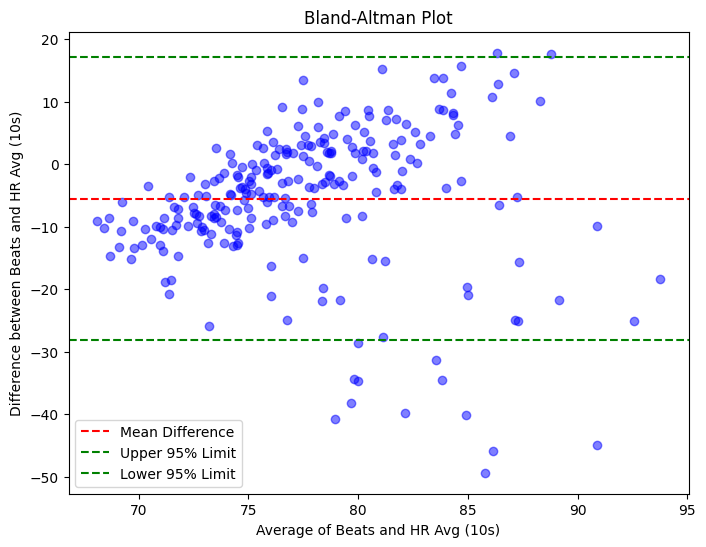

In [53]:
import matplotlib.pyplot as plt

# 2. **Bland-Altman Plot**
differences = beats_trimmed - HR
averages = (beats_trimmed + HR) / 2

# Create the Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(averages, differences, color='blue', alpha=0.5)
plt.axhline(np.mean(differences), color='red', linestyle='--', label='Mean Difference')
plt.axhline(np.mean(differences) + 1.96 * np.std(differences), color='green', linestyle='--', label='Upper 95% Limit')
plt.axhline(np.mean(differences) - 1.96 * np.std(differences), color='green', linestyle='--', label='Lower 95% Limit')
plt.title('Bland-Altman Plot')
plt.xlabel('Average of Beats and HR Avg (10s)')
plt.ylabel('Difference between Beats and HR Avg (10s)')
plt.legend()
plt.show()
plt.savefig("bland_altman_plot.png", dpi=300, bbox_inches='tight')




<Figure size 640x480 with 0 Axes>

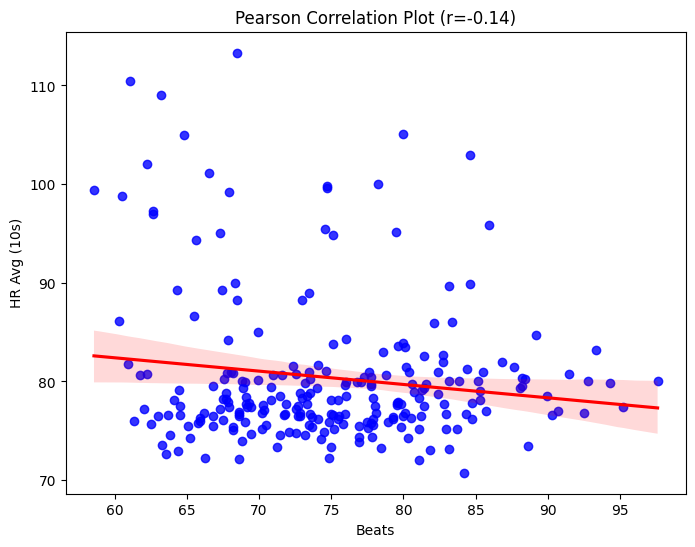

Pearson Correlation: -0.14357372446439498


In [54]:
from scipy import stats
import seaborn as sns


# 3. **Pearson Correlation Plot**
# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(beats_trimmed, HR)

# Create the scatter plot for Pearson correlation
plt.figure(figsize=(8, 6))
sns.regplot(x=beats_trimmed, y=HR, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Pearson Correlation Plot (r={pearson_corr:.2f})')
plt.xlabel('Beats')
plt.ylabel('HR Avg (10s)')
plt.show()
plt.savefig("pearson_correlation_plot.png", dpi=300)


# Output Pearson correlation
print(f'Pearson Correlation: {pearson_corr}')